## Model Development
    - imports
    - review data
    - prepare data for model (one hot)
    - data split
    - multiple logistic model
    - feature importance

In [186]:
# imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
pd.set_option('display.max_columns', None)


In [162]:
# review data
data = pd.read_csv('fulldata2.csv')
data = data.drop(data.columns[[0,-1]], axis=1) #droping the random 0th and last column (no need for name in the model as they are completely random)
data.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,April,August,December,February,January,July,June,March,May,November,October,September,FullYearHoursWorked
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1,Y,11,8,0,1,6,1,0,0,3,4,2,3,3,163.631944,155.394722,141.147778,140.977778,130.835556,161.522222,139.826111,139.573889,125.864444,131.501111,132.720556,147.690833,1711.686944
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0,Y,23,8,1,6,3,5,1,4,3,2,4,2,4,162.228333,163.126667,163.800556,147.937500,134.975833,154.620278,162.849167,153.100833,138.999167,132.047222,154.110833,153.880278,1823.676667
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1,Y,15,8,3,5,2,5,0,3,2,2,1,3,3,149.563611,138.135278,147.621111,138.548333,133.398611,156.012500,146.973333,133.408333,138.610833,119.270556,146.597500,149.064167,1700.204167
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3,Y,11,8,3,13,5,8,7,5,4,4,3,2,3,149.869722,130.016667,159.004444,135.360278,134.114722,153.477500,159.491111,129.300278,138.118611,122.262778,135.605833,143.892500,1694.514444
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4,Y,12,8,2,9,2,6,0,4,4,1,3,3,3,167.636667,159.740278,175.652222,159.836944,143.806667,174.131389,168.908889,167.332500,160.623056,145.628333,168.800556,169.415278,1966.512778


In [163]:
# One hot encode the Attrition
Attrition = ['No', 'Yes']
enc = OrdinalEncoder(categories = [Attrition])
data['Attrition'] = enc.fit_transform(data[['Attrition']])
data.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,April,August,December,February,January,July,June,March,May,November,October,September,FullYearHoursWorked
0,1,51,0.0,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1,Y,11,8,0,1,6,1,0,0,3,4,2,3,3,163.631944,155.394722,141.147778,140.977778,130.835556,161.522222,139.826111,139.573889,125.864444,131.501111,132.720556,147.690833,1711.686944
1,2,31,1.0,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0,Y,23,8,1,6,3,5,1,4,3,2,4,2,4,162.228333,163.126667,163.800556,147.937500,134.975833,154.620278,162.849167,153.100833,138.999167,132.047222,154.110833,153.880278,1823.676667
2,3,32,0.0,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1,Y,15,8,3,5,2,5,0,3,2,2,1,3,3,149.563611,138.135278,147.621111,138.548333,133.398611,156.012500,146.973333,133.408333,138.610833,119.270556,146.597500,149.064167,1700.204167
3,4,38,0.0,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3,Y,11,8,3,13,5,8,7,5,4,4,3,2,3,149.869722,130.016667,159.004444,135.360278,134.114722,153.477500,159.491111,129.300278,138.118611,122.262778,135.605833,143.892500,1694.514444
4,5,32,0.0,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4,Y,12,8,2,9,2,6,0,4,4,1,3,3,3,167.636667,159.740278,175.652222,159.836944,143.806667,174.131389,168.908889,167.332500,160.623056,145.628333,168.800556,169.415278,1966.512778


In [164]:
# I need to see the various data types to hone in on categorical fields
data.dtypes

# columns to one hot: BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Over18
# will need to look through the level counts to make sure that there are not too too many (10+)

EmployeeID                   int64
Age                          int64
Attrition                  float64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction      int64
JobSatisfaction              int64
WorkLifeBalance              int64
JobInvolvement               int64
PerformanceRating   

In [165]:
# value counts for BusinessTravel

data['BusinessTravel'].value_counts()

Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: BusinessTravel, dtype: int64

In [166]:
data['Department'].value_counts()

Research & Development    2883
Sales                     1338
Human Resources            189
Name: Department, dtype: int64

In [167]:
data['EducationField'].value_counts()

Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: EducationField, dtype: int64

In [168]:
data['Gender'].value_counts()

Male      2646
Female    1764
Name: Gender, dtype: int64

In [169]:
data['JobRole'].value_counts()

Sales Executive              978
Research Scientist           876
Laboratory Technician        777
Manufacturing Director       435
Healthcare Representative    393
Manager                      306
Sales Representative         249
Research Director            240
Human Resources              156
Name: JobRole, dtype: int64

In [170]:
data['MaritalStatus'].value_counts()

Married     2019
Single      1410
Divorced     981
Name: MaritalStatus, dtype: int64

In [171]:
data['Over18'].value_counts()
# should drop this as it wont add any new additional data to the model above and beyond naive
data.drop('Over18', axis=1)
data.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,April,August,December,February,January,July,June,March,May,November,October,September,FullYearHoursWorked
0,1,51,0.0,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1,Y,11,8,0,1,6,1,0,0,3,4,2,3,3,163.631944,155.394722,141.147778,140.977778,130.835556,161.522222,139.826111,139.573889,125.864444,131.501111,132.720556,147.690833,1711.686944
1,2,31,1.0,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0,Y,23,8,1,6,3,5,1,4,3,2,4,2,4,162.228333,163.126667,163.800556,147.937500,134.975833,154.620278,162.849167,153.100833,138.999167,132.047222,154.110833,153.880278,1823.676667
2,3,32,0.0,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1,Y,15,8,3,5,2,5,0,3,2,2,1,3,3,149.563611,138.135278,147.621111,138.548333,133.398611,156.012500,146.973333,133.408333,138.610833,119.270556,146.597500,149.064167,1700.204167
3,4,38,0.0,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3,Y,11,8,3,13,5,8,7,5,4,4,3,2,3,149.869722,130.016667,159.004444,135.360278,134.114722,153.477500,159.491111,129.300278,138.118611,122.262778,135.605833,143.892500,1694.514444
4,5,32,0.0,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4,Y,12,8,2,9,2,6,0,4,4,1,3,3,3,167.636667,159.740278,175.652222,159.836944,143.806667,174.131389,168.908889,167.332500,160.623056,145.628333,168.800556,169.415278,1966.512778


In [172]:
data =pd.get_dummies(data)

In [173]:
# moving the attrition column to make it easier for a split
column_to_move = 'Attrition'
column = data.pop(column_to_move)
new_position = 0
data.insert(new_position, column_to_move, column)

In [174]:
# x and y split
y = data.loc[:,'Attrition']
x = data.iloc[:, 1:]

In [175]:
# test and train data split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=.8, random_state=57)

In [176]:
# x_train.shape
# x_test.shape
# y_train.shape
# y_test.shape

In [177]:
model = LogisticRegression()

In [178]:
model.fit(x_train,y_train)

LogisticRegression()

In [197]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [179]:
y_pred = model.predict(x_test)

In [181]:
model.score(x_test,y_test)

0.8469387755102041

In [189]:
print(confusion_matrix(y_test,y_pred))

[[730   9]
 [126  17]]


In [190]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.99      0.92       739
         1.0       0.65      0.12      0.20       143

    accuracy                           0.85       882
   macro avg       0.75      0.55      0.56       882
weighted avg       0.82      0.85      0.80       882



<Axes: ylabel='Feature'>

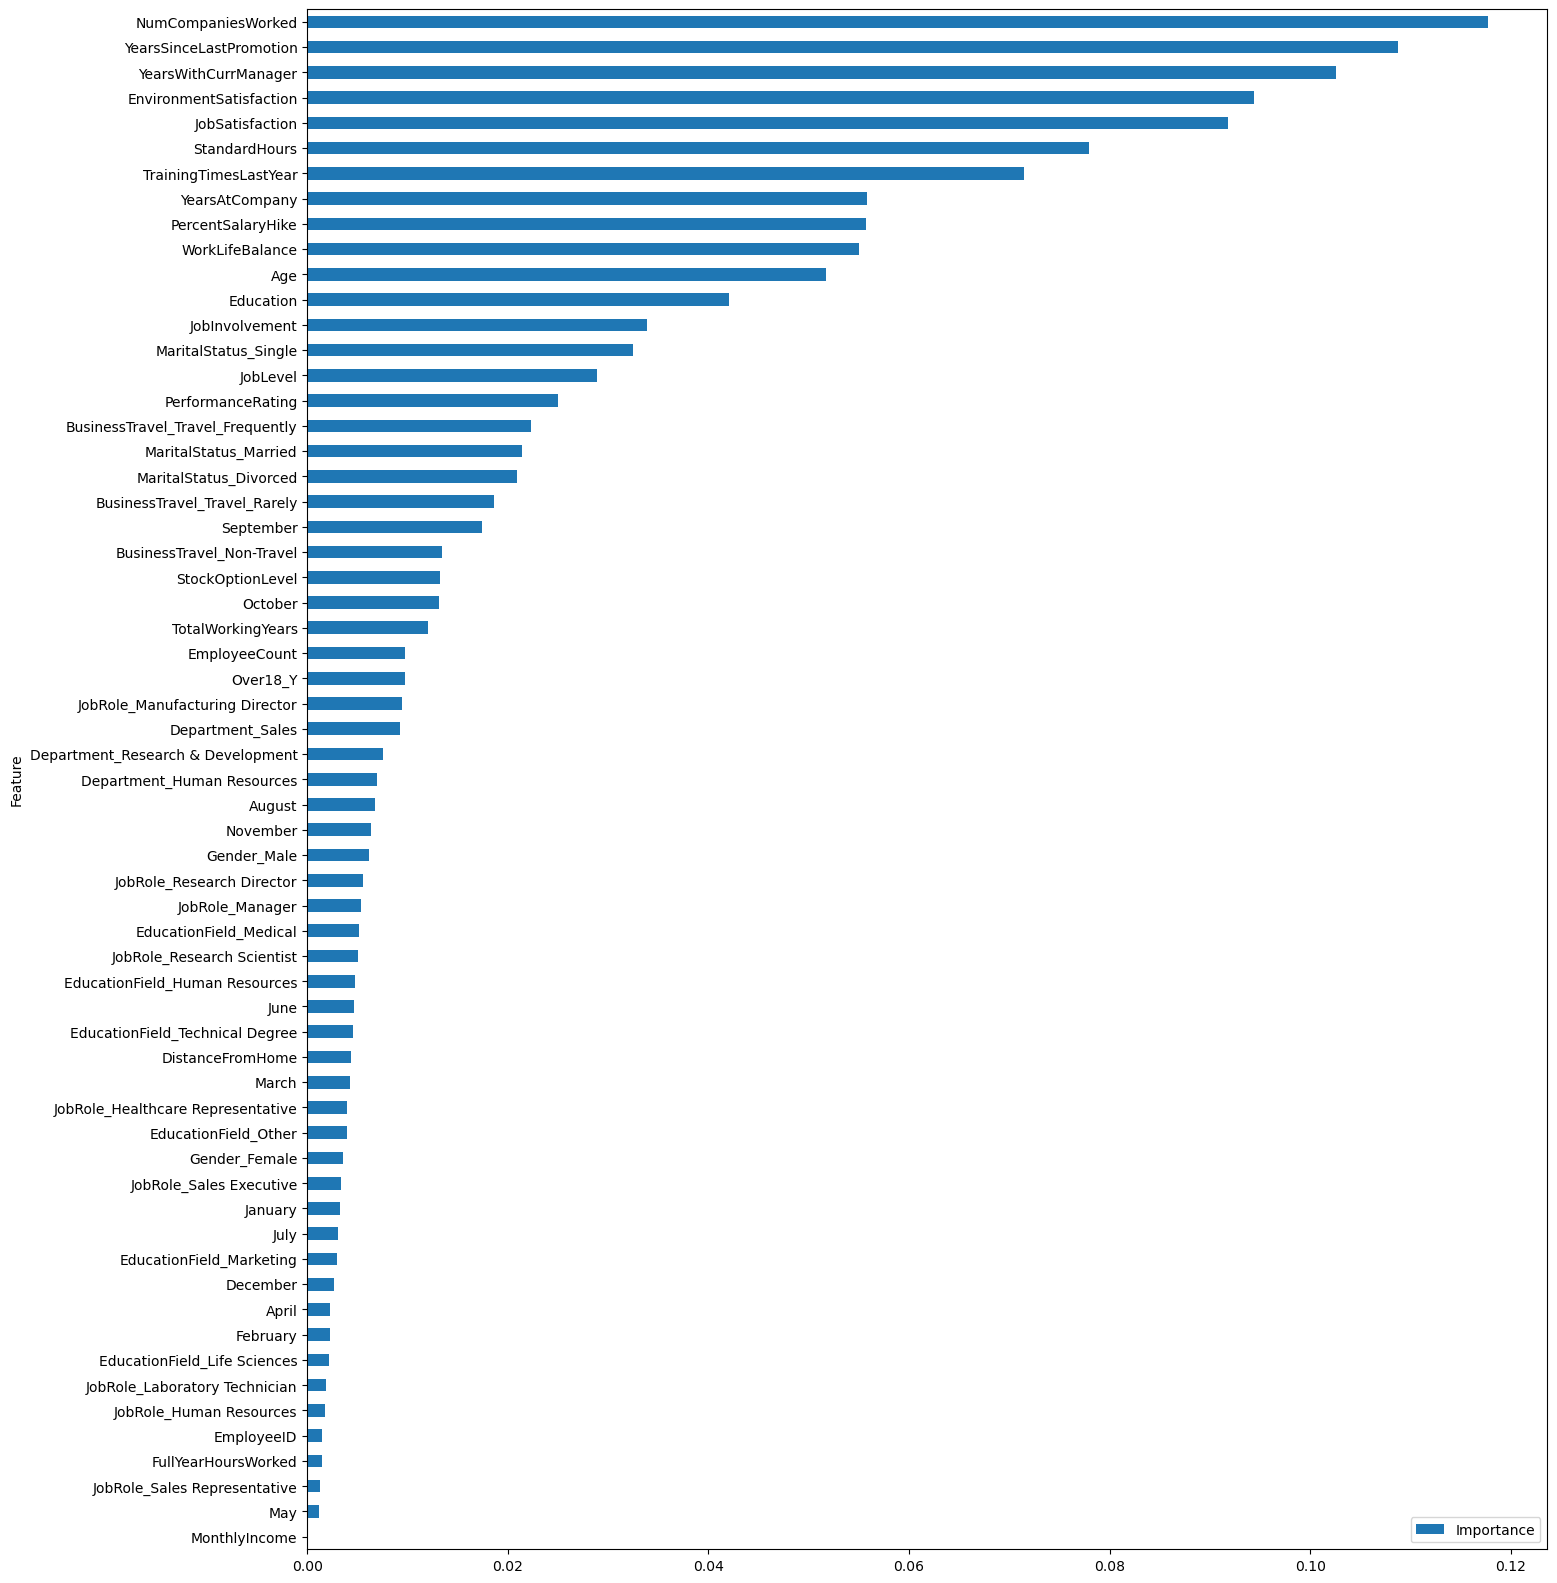

In [194]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

model = LogisticRegression()
model.fit(x_train, y_train)


coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(16, 20))

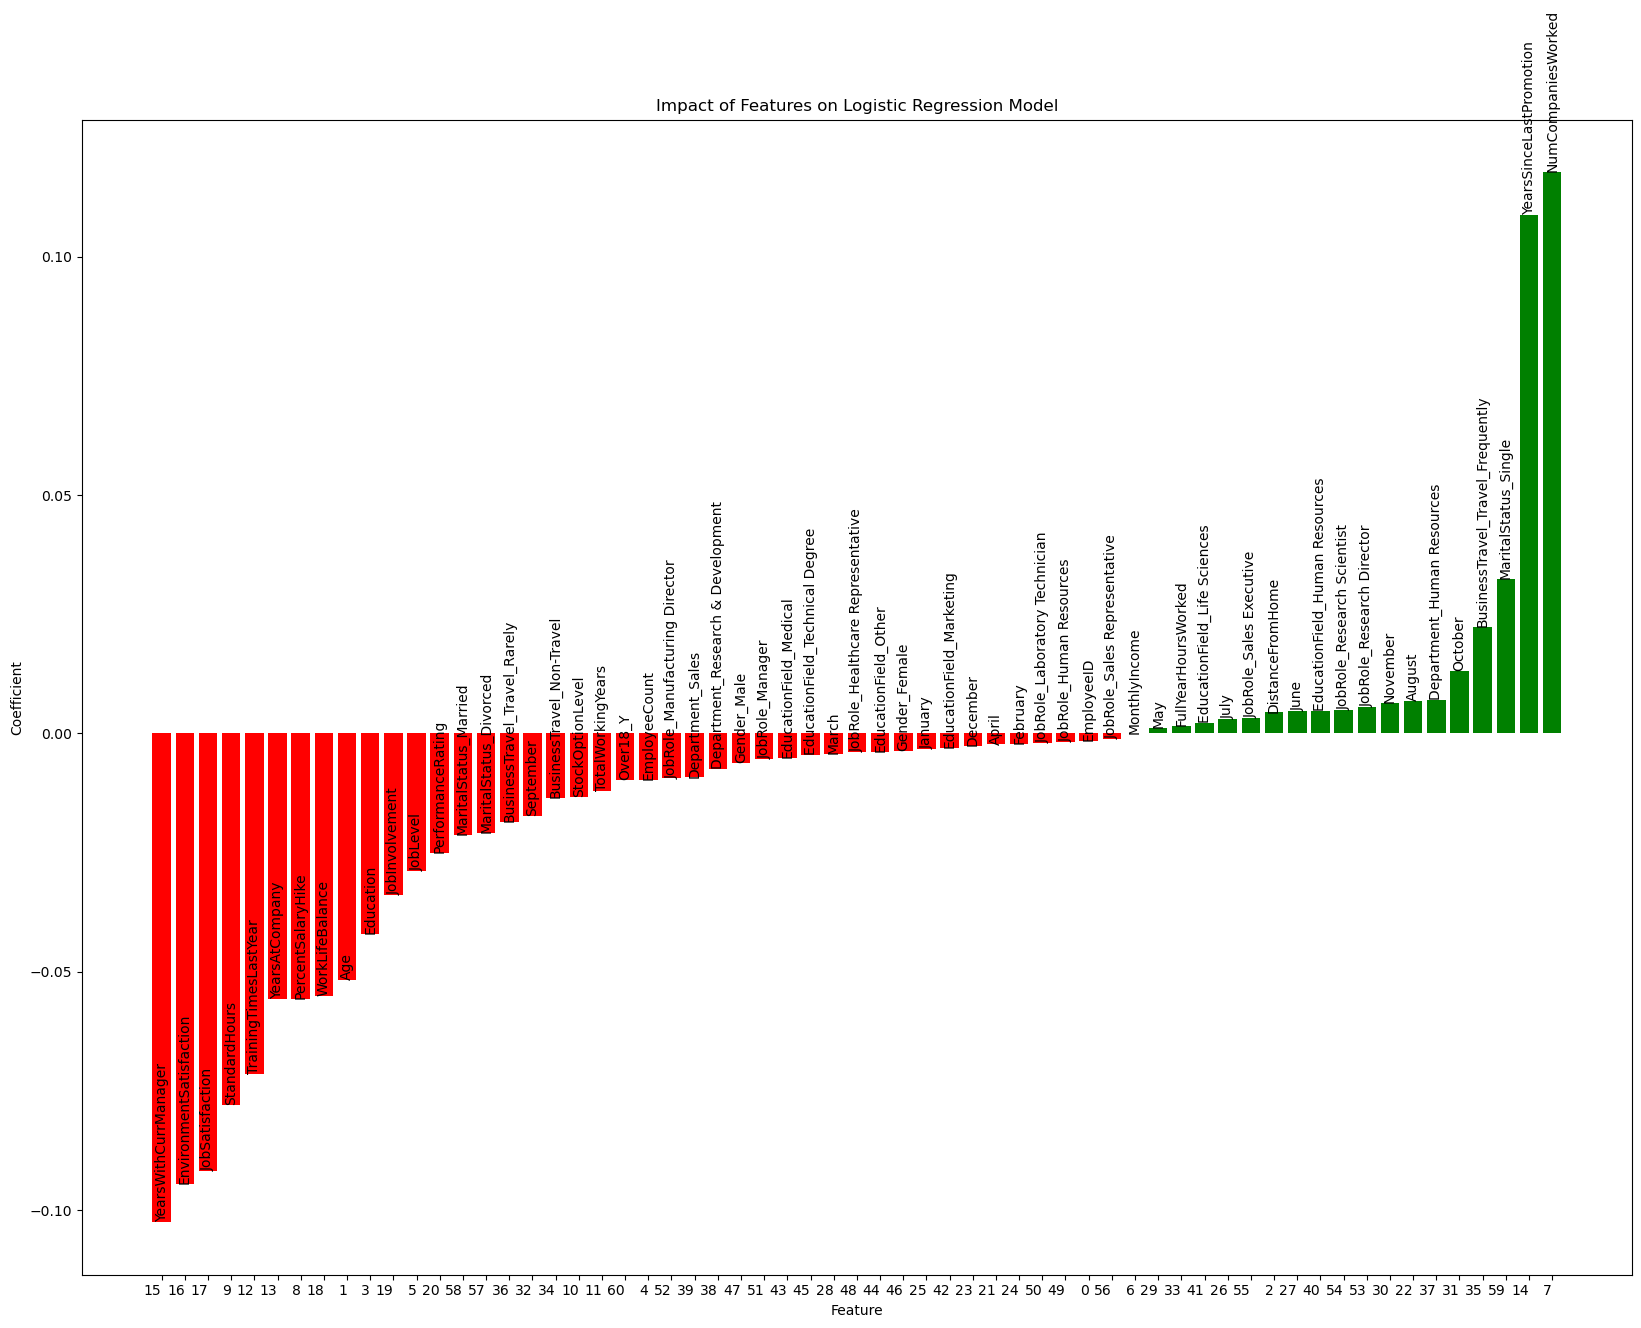

In [227]:
import matplotlib.pyplot as plt

feature_names = x_train.columns

# pulling coefficients from the model
coefficients = model.coef_[0]

# DF of features and coefficients
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Positive and negative impact
feature_importance['Impact'] = ['Positive' if coef > 0 else 'Negative' for coef in coefficients]

#sorting descending
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=True)

#plot
plt.figure(figsize=(20, 15))
colors = ['green' if impact == 'Positive' else 'red' for impact in feature_importance['Impact']]
bars = plt.bar(feature_importance['Feature'], feature_importance['Coefficient'], color=colors)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Impact of Features on Logistic Regression Model') 
plt.xticks(range(len(feature_importance)), feature_importance.index, ha='right')

for bar, feature_name in zip(bars, feature_importance['Feature']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, feature_name, ha='center', va='bottom', rotation=90)

plt.show()

According to the plot above, HR should focus primarily in improving the various features that are in Red, starting from the most negative impact to the least to get the greatest amount of reterntion out of employees.